## Heading
This is an example of markdown text.

### New section
One can easily include equations<br>
$\hat{Y} = \hat{\beta}_{0} + \sum \limits _{j=1} ^{p} X_{j}\hat{\beta}_{j}$ &emsp; (Eq. 1)

and other guides for the reader, or long paragraphs with references.[1]



***
#### Bibliography
[1] Lasser, J. Creating an executable paper is a journey through Open Science. *Commun Phys* 3, 143 **2020**. https://doi.org/10.1038/s42005-020-00403-4




### Preamble

In [7]:
import numpy as np
from numpy import exp
import scipy as sp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import glob
import pandas as pd
import matplotlib as mpl
import os
mpl.rcParams.update({'font.size': 18, 'font.family': 'sans-serif'})
from cycler import cycler


color = mpl.cm.nipy_spectral(np.linspace(0, 1, 13))
mpl.rcParams['axes.prop_cycle'] = cycler('color', color)

In [14]:
folder_name='\\Example data'
#basename='52K_15s_long'
bkg_file='R64903'
data_file='R65096'

 


In [15]:
#identify the file name as a string 
background=("Example data\\"+bkg_file+".dat")
#print(type(i0))
#define wavelengh (wl) i0 (measured intensity) and i0_curr (beamcurrent) as an array of strings, made up of floats, by extracting columns 0,1,6 from the text file
wl, i0, i0_curr = np.loadtxt(background, dtype=float, delimiter=None, skiprows=18, usecols=(0,1,6), unpack=True)
#then normalise to the beamcurrent
i0_norm = i0/i0_curr*180



The array of x-values (wavelengths) is:
[191.  191.5 192.  192.5 193.  193.5 194.  194.5 195.  195.5 196.  196.5
 197.  197.5 198.  198.5 199.  199.5 200. ]
and they have been saved to wavelength_long.dat


--------------G1----------------
amplitude = 0.90 (+/-) 0.01
center = 191.86 (+/-) 0.10
sigma = 2.80 (+/-) 0.06
--------------G2----------------
amplitude = 0.13 (+/-) 0.01
center = 193.85 (+/-) 0.02
sigma = 0.94 (+/-) 0.03


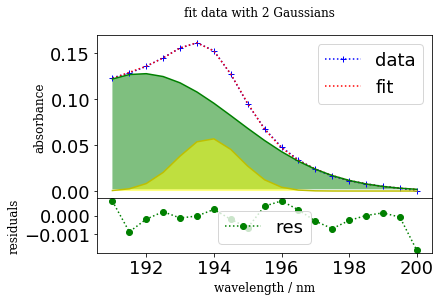

In [22]:
amplitudeG1 = np.array([])
amplitudeG2 = np.array([])

amplitude_err_G1 = np.array([])
amplitude_err_G2 = np.array([])

positionG2 = np.array([])
positionG1 = np.array([])

res = np.array([])

timestamp_raw = np.array([])

filenames=sorted(glob.glob('Example data\\R*.dat'))
#print(filenames)
#define each element in the filenames list as "f" and do lots of thing to each element

data=("Example data\\"+data_file+".dat")
it, it_curr = np.loadtxt(data, dtype=float, delimiter=None, skiprows=18, usecols=(1,6),  unpack=True)
it_norm = it/it_curr*180
absorp=np.log10(i0_norm/it_norm)
_bk=min(absorp)
absorp_bk=absorp-_bk
def _1gaussian(wl,amp1,cen1,sigma1):
        return (amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((wl-cen1)/sigma1)**2))))
def _2gaussian(wl,amp1,cen1,sigma1,amp2,cen2,sigma2):
        return (amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((wl-cen1)/sigma1)**2))) + \
            amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((wl-cen2)/sigma2)**2))))
init_vals=[0.78, 191.1, 3, 0.05, 194.0,0.9] # for [amp1, cen1, simgma1, amp2, cen2, simgma2]
popt_2gauss, pcov_2gauss = curve_fit(_2gaussian, wl, absorp_bk, p0=init_vals, bounds=([0.7,191,2.5,0,193,0.5],[2,192,6,0.9,194.2,1])
                                        ) #use the bonds argument to add limits to the parameters, 
                                            #the first braket gives the lower limit for all parameteres 
                                            #and the second brecket gives the upper limit
perr_2gauss = np.sqrt(np.diag(pcov_2gauss)) # calculate the err on the fit
residual_2gauss = absorp_bk - (_2gaussian(wl, *popt_2gauss)) # make a function to subtract the fit from the data called residuals
residuals=sum((absorp_bk-(_2gaussian(wl, *popt_2gauss)))**2)
res=np.append(res,(residuals))   
    
pars_1 = popt_2gauss[0:3] # divide the output parameteres into to arrays, one for the first Gaussian and a 2nd for Gaussian 2
pars_2 = popt_2gauss[3:6]
pars_err_1 = perr_2gauss[0:3] # divide the output parameteres into to arrays, one for the first Gaussian and a 2nd for Gaussian 2
pars_err_2 = perr_2gauss[3:6]
    #Define a variable to process these fit values into as arrays:
gauss_peak_1 = _1gaussian(wl, *pars_1)
gauss_peak_2 = _1gaussian(wl, *pars_2)    

print('--------------G1----------------')
print ("amplitude = %0.2f (+/-) %0.2f" % (pars_1[0], pars_err_1[0]))
print ("center = %0.2f (+/-) %0.2f" % (pars_1[1], pars_err_1[1]))
print ("sigma = %0.2f (+/-) %0.2f" % (pars_1[2], pars_err_1[2]))

print('--------------G2----------------')
print ("amplitude = %0.2f (+/-) %0.2f" % (pars_2[0], pars_err_2[0]))
print ("center = %0.2f (+/-) %0.2f" % (pars_2[1], pars_err_2[1]))
print ("sigma = %0.2f (+/-) %0.2f" % (pars_2[2], pars_err_2[2]))

fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios':[3,1]}) # I am making a 2 x 1 row x column grid, when the first row is 3 times the height ofthe2nd
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)
    
fig.suptitle('fit data with 2 Gaussians', family="serif", fontsize=12)
plt.xlabel('wavelength / nm', family="serif", fontsize=12)
axs[1].plot(wl,residual_2gauss,'go:',label='res')
axs[1].legend() 
axs[1].set_ylabel("residuals",family="serif", fontsize=12)  
axs[0].plot(wl,absorp_bk,'b+:',label='data')
axs[0].plot(wl,_2gaussian(wl,*popt_2gauss),'r:',label='fit')
axs[0].legend()
axs[0].plot(wl, gauss_peak_1, "g")
axs[0].fill_between(wl, gauss_peak_1.min(), gauss_peak_1, facecolor="green", alpha=0.5)
axs[0].set_ylabel("absorbance",family="serif", fontsize=12)    
axs[0].plot(wl, gauss_peak_2, "y")
axs[0].fill_between(wl, gauss_peak_2.min(), gauss_peak_2, facecolor="yellow", alpha=0.5)  
    
plt.show() #This command would plot a different graph for each f
   
fig.savefig(data_file+' 2G fit to last time point', dpi=300, bbox_inches='tight')
